### 线性回归的相关的知识内容可以参考 
http://blog.csdn.net/luanpeng825485697/article/details/78933084

### 这里只讲述sklearn中如何使用线性回归进行估值预测。



---
# 参数：

+ **fit_intercept**: 布尔型，默认为true

> 说明：是否对训练数据进行中心化。如果该变量为false，则表明输入的数据已经进行了中心化，在下面的过程里不进行中心化处理；否则，对输入的训练数据进行中心化处理

+ **normalize**: 布尔型，默认为false

> 说明：是否对数据进行标准化处理

+ **copy_X**: 布尔型，默认为true

> 说明：是否对X复制，如果选择false，则直接对原数据进行覆盖。（即经过中心化，标准化后，是否把新数据覆盖到原数据上）

+ **n_jobs**: 整型， 默认为1

> 说明：计算时设置的任务个数(number of jobs)。如果选择-1则代表使用所有的CPU。这一参数的对于目标个数>1（n_targets>1）且足够大规模的问题有加速作用。

---
# 返回值：

+ **coef_** 数组型变量， 形状为(n_features,)或(n_targets, n_features)

> 说明：对于线性回归问题计算得到的feature的系数。如果输入的是多目标问题，则返回一个二维数组(n_targets, n_features)；如果是单目标问题，返回一个一维数组 (n_features,)。

+ **intercept_** 数组型变量

> 说明：线性模型中的独立项。

注：该算法仅仅是scipy.linalg.lstsq经过封装后的估计器。

---
# 方法：

+ **decision_function(X)** : 对训练数据X进行预测 
+ **fit(X, y[, n_jobs])** : 对训练集X, y进行训练。是对scipy.linalg.lstsq的封装 
+ **get_params([deep])** : 得到该估计器(estimator)的参数。 
+ **predict(X)**: 使用训练得到的估计器对输入为X的集合进行预测（X可以是测试集，也可以是需要预测的数据）。

+ **score(X, y[,]sample_weight)**: 返回对于以X为samples，以y为target的预测效果评分。

+ **set_params(params)****: 设置估计器的参数

decision_function(X) 和predict(X)都是利用预估器对训练数据X进行预测，其中decision_function(X)包含了对输入数据的类型检查，以及当前对象是否存在coef_属性的检查，是一种“安全的”方法，而predict是对decision_function的调用。

```score(X, y[,]sample_weight)``` 定义为(1-u/v)，其中 ```u = （（y_true - y_pred）**2）.sum()，而v=((y_true-y_true.mean())**2).mean()```

最好的得分为1.0，一般的得分都比1.0低，得分越低代表结果越差。

其中sample_weight为(samples_n,)形状的向量，可以指定对于某些sample的权值，如果觉得某些数据比较重要，可以将其的权值设置的大一些。

系数矩阵:
 [1.6314263]
线性回归模型:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


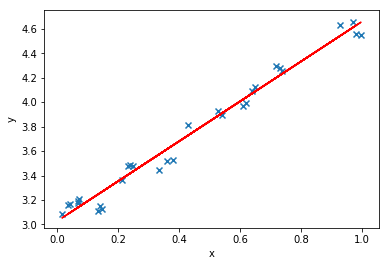

In [2]:
import numpy as np # 快速操作结构数组的工具  
import matplotlib.pyplot as plt  # 可视化绘制  
from sklearn.linear_model import LinearRegression  # 线性回归  


# 样本数据集，第一列为x，第二列为y，在x和y之间建立回归模型  
data=[  
    [0.067732,3.176513],[0.427810,3.816464],[0.995731,4.550095],[0.738336,4.256571],[0.981083,4.560815],  
    [0.526171,3.929515],[0.378887,3.526170],[0.033859,3.156393],[0.132791,3.110301],[0.138306,3.149813],  
    [0.247809,3.476346],[0.648270,4.119688],[0.731209,4.282233],[0.236833,3.486582],[0.969788,4.655492],  
    [0.607492,3.965162],[0.358622,3.514900],[0.147846,3.125947],[0.637820,4.094115],[0.230372,3.476039],  
    [0.070237,3.210610],[0.067154,3.190612],[0.925577,4.631504],[0.717733,4.295890],[0.015371,3.085028],  
    [0.335070,3.448080],[0.040486,3.167440],[0.212575,3.364266],[0.617218,3.993482],[0.541196,3.891471]  
]  


#生成X和y矩阵  
dataMat = np.array(data)  
X = dataMat[:,0:1]   # 变量x  
y = dataMat[:,1]   #变量y  



# ========线性回归========  
model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)  
model.fit(X, y)   # 线性回归建模  
print('系数矩阵:\n',model.coef_)  
print('线性回归模型:\n',model)  
# 使用模型预测  
predicted = model.predict(X)  

# 绘制散点图 参数：x横轴 y纵轴  
plt.scatter(X, y, marker='x')  
plt.plot(X, predicted,c='r')  

# 绘制x轴和y轴坐标  
plt.xlabel("x")  
plt.ylabel("y")  

# 显示图形  
plt.show()  